In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Some age are less than 1...let's change that to 1 as we can't have age less than one

<AxesSubplot:xlabel='age', ylabel='count'>

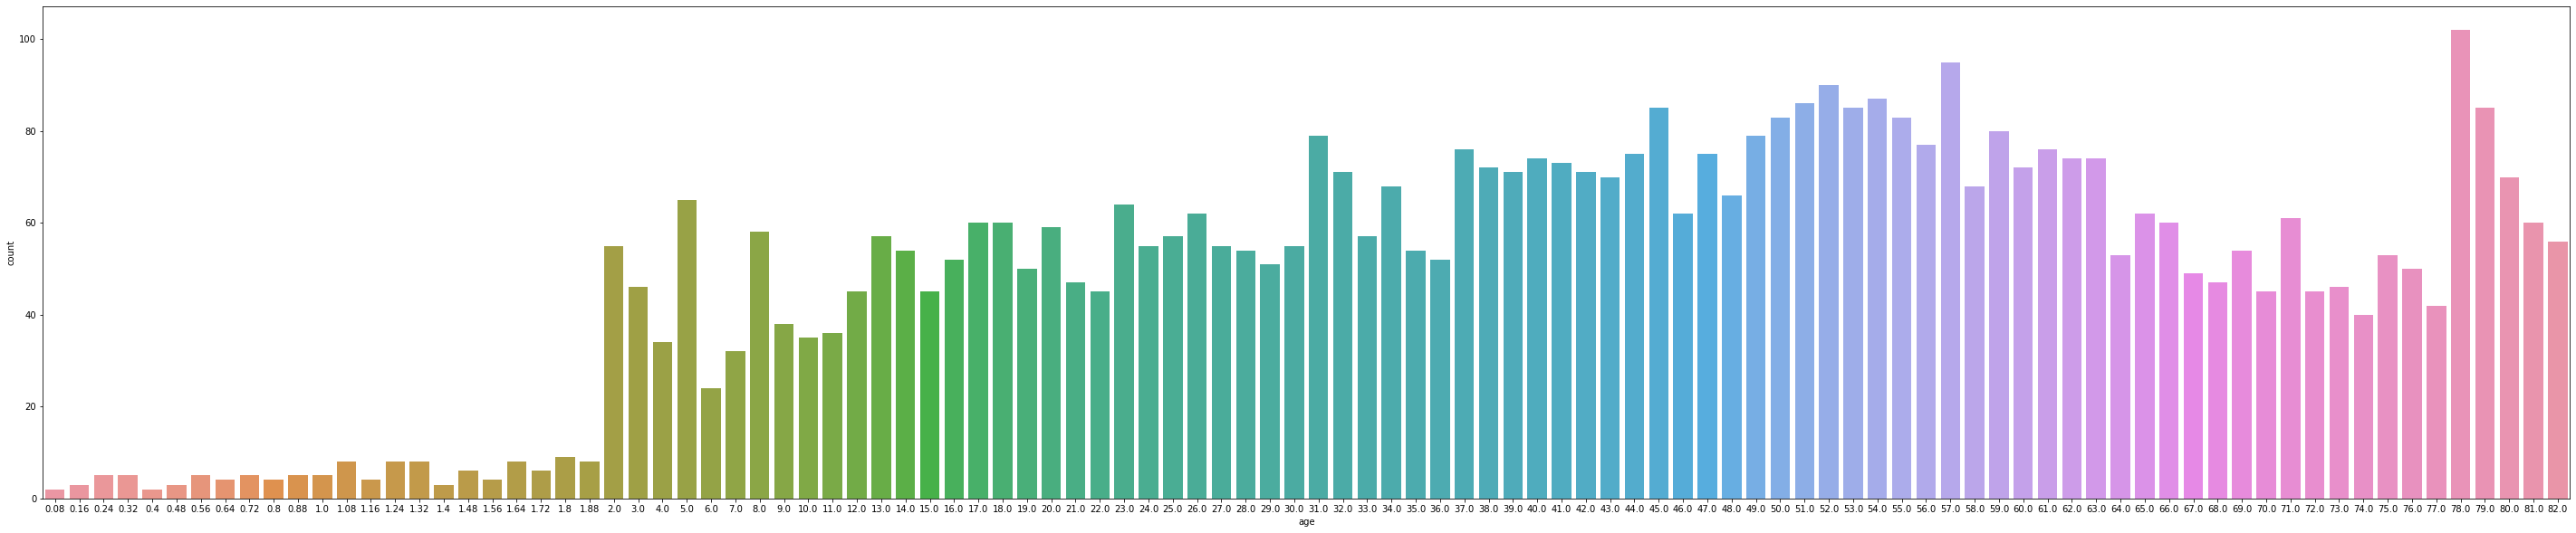

In [7]:
plt.figure(figsize = (50,10))
sns.countplot(data=df, x = 'age')

In [8]:
len(df[df['age'] <= 1])

48

In [9]:
def childage(col):
    for i in col:
        
        if i <= 1:
            return 1
        else:
            return i

In [10]:
df['age'] = df[['age']].apply(childage,axis=1)

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.230677,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.605002,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# LET's dive into bmi as some of its data are missing

In [12]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df.corr()['bmi'].sort_values()[1:-1]

heart_disease        0.041357
stroke               0.042374
hypertension         0.167811
avg_glucose_level    0.175502
age                  0.333245
Name: bmi, dtype: float64

<AxesSubplot:>

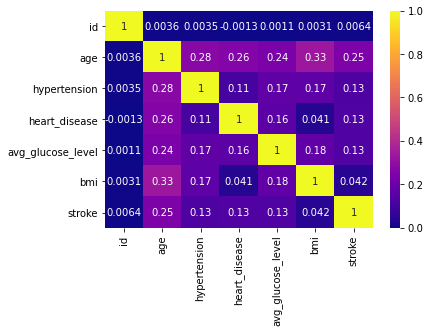

In [14]:
sns.heatmap(data=df.corr() , cmap = 'plasma' , annot=True)

# Okay we'll keep this for later, let's now focus on all the object categorical columns and make dummy variables

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
df2 = pd.get_dummies(df ,columns = ['gender' , 'ever_married' , 'work_type' , 'Residence_type' , 'smoking_status'] , drop_first= True)

In [17]:
df2.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [18]:
df = df2

In [19]:
df2.drop('id',axis=1,inplace=True)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Male                     5110 non-null   uint8  
 7   gender_Other                    5110 non-null   uint8  
 8   ever_married_Yes                5110 non-null   uint8  
 9   work_type_Never_worked          5110 non-null   uint8  
 10  work_type_Private               5110 non-null   uint8  
 11  work_type_Self-employed         5110 non-null   uint8  
 12  work_type_children              51

In [21]:
df2['smoking_status_never smoked'] =  df2['smoking_status_never smoked'].astype(np.int64)
df2['smoking_status_smokes'] =  df2['smoking_status_smokes'].astype(np.int64)

In [22]:
df2['smoking_status_formerly smoked'] =  df2['smoking_status_formerly smoked'].astype(np.int64)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Male                     5110 non-null   uint8  
 7   gender_Other                    5110 non-null   uint8  
 8   ever_married_Yes                5110 non-null   uint8  
 9   work_type_Never_worked          5110 non-null   uint8  
 10  work_type_Private               5110 non-null   uint8  
 11  work_type_Self-employed         5110 non-null   uint8  
 12  work_type_children              51

In [24]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [25]:
df2['gender_Male'] =  df2['gender_Male'].astype(np.int64)
df2['gender_Other'] =  df2['gender_Other'].astype(np.int64)
df2['ever_married_Yes'] =  df2['ever_married_Yes'].astype(np.int64)
df2['work_type_Never_worked'] =  df2['work_type_Never_worked'].astype(np.int64)
df2['work_type_Private'] =  df2['work_type_Private'].astype(np.int64)
df2['work_type_Self-employed'] =  df2['work_type_Self-employed'].astype(np.int64)
df2['work_type_children'] =  df2['work_type_children'].astype(np.int64)
df2['Residence_type_Urban'] =  df2['Residence_type_Urban'].astype(np.int64)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Male                     5110 non-null   int64  
 7   gender_Other                    5110 non-null   int64  
 8   ever_married_Yes                5110 non-null   int64  
 9   work_type_Never_worked          5110 non-null   int64  
 10  work_type_Private               5110 non-null   int64  
 11  work_type_Self-employed         5110 non-null   int64  
 12  work_type_children              51

In [27]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
# just to keep referencing from point to point

In [28]:
df2.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.230677,0.097456,0.054012,106.147677,28.893237,0.048728,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,22.605002,0.296607,0.226063,45.283560,7.854067,0.215320,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df2.drop('stroke',axis=1,inplace=True)
df2['stroke'] = data['stroke']
df2.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0,1
1,61.0,0,0,202.21,NaN,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0,1
3,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0,1


# LET'S GET BACK TO MISSING DATA IN BMI COLUMN

In [30]:
df2.isna().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
gender_Male                         0
gender_Other                        0
ever_married_Yes                    0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Urban                0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
stroke                              0
dtype: int64

In [31]:
df2.corr()['bmi'].sort_values()[:-1]

work_type_children               -0.448674
work_type_Never_worked           -0.028602
gender_Male                      -0.026020
gender_Other                     -0.011802
Residence_type_Urban             -0.000122
heart_disease                     0.041357
stroke                            0.042374
work_type_Self-employed           0.072701
smoking_status_smokes             0.088324
smoking_status_formerly smoked    0.107031
smoking_status_never smoked       0.107964
hypertension                      0.167811
avg_glucose_level                 0.175502
work_type_Private                 0.208029
age                               0.333245
ever_married_Yes                  0.341695
Name: bmi, dtype: float64

In [32]:
201 / len(df2)

0.03933463796477495

In [33]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


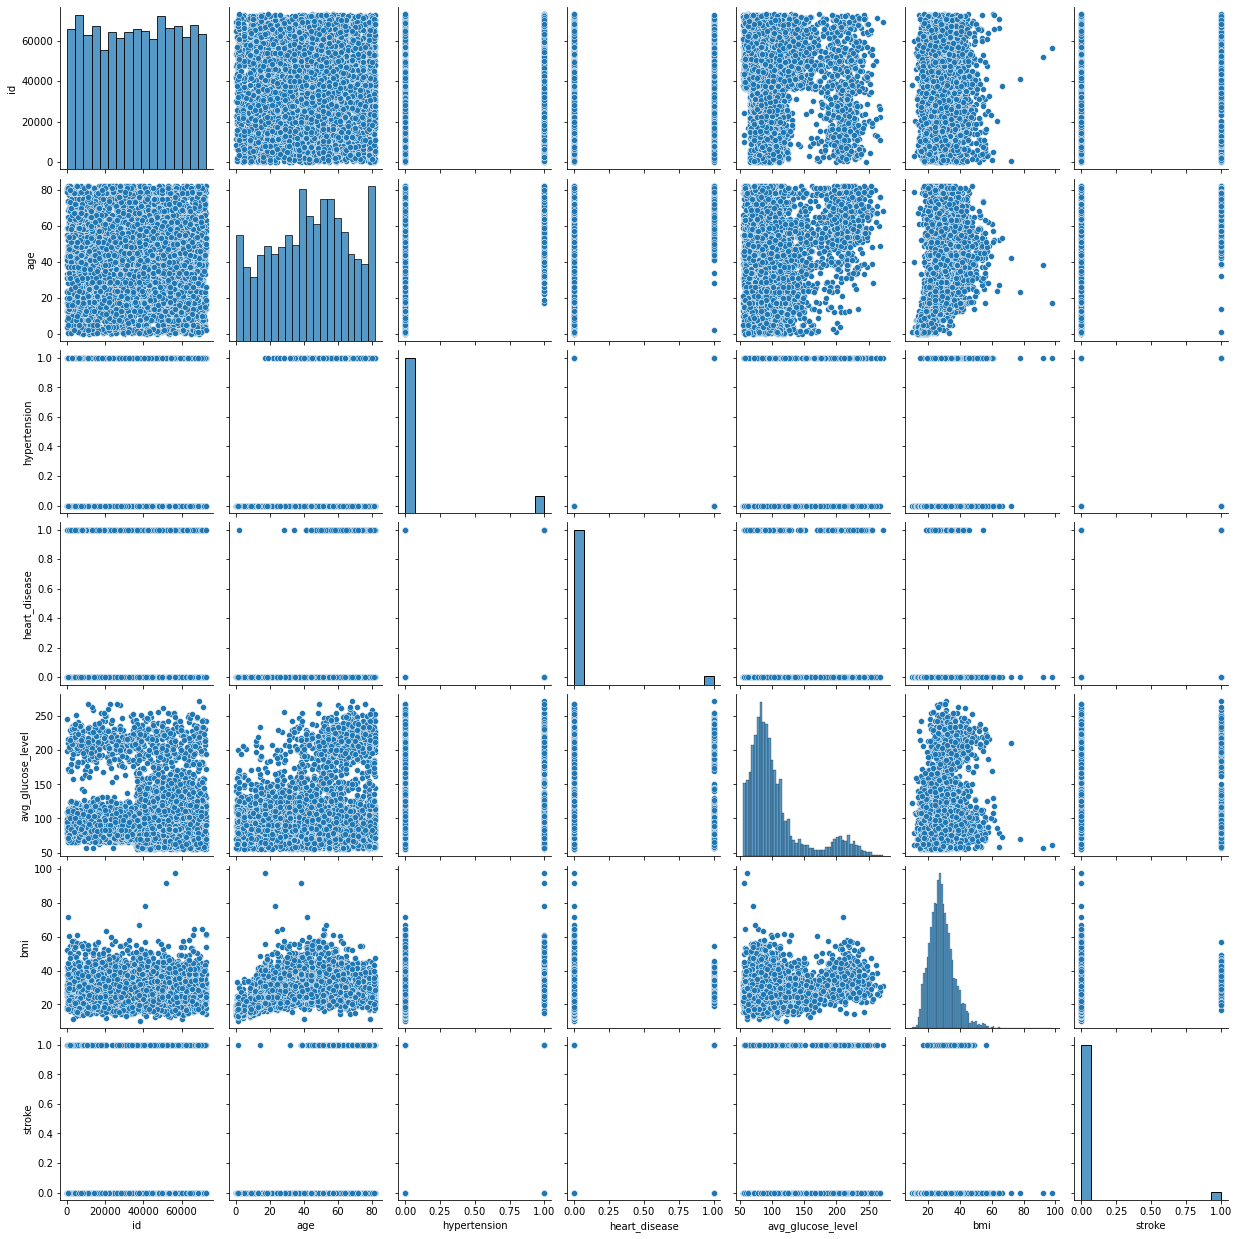

In [34]:
sns.pairplot(data=data)

<AxesSubplot:xlabel='hypertension', ylabel='bmi'>

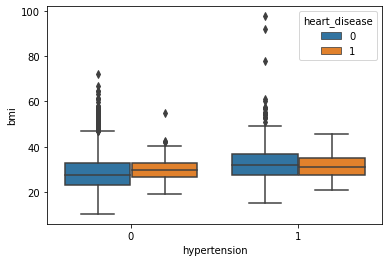

In [35]:
sns.boxplot(data=data , x = 'hypertension',y='bmi' , hue = 'heart_disease')

In [36]:
df2['age'].describe()

count    5110.000000
mean       43.230677
std        22.605002
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [37]:
def impute_age(age):
    if age in range(0,5):
        return 1
    elif age in range(5,10):
        return 2
    elif age in range(10,15):
        return 3
    elif age in range(15,20):
        return 4
    elif age in range(20,25):
        return 5
    elif age in range(25,30):
        return 6
    elif age in range(30,35):
        return 7
    elif age in range(35,40):
        return 8
    elif age in range(40,45):
        return 9
    elif age in range(45,50):
        return 10
    elif age in range(50,55):
        return 11
    elif age in range(55,60):
        return 12
    elif age in range(60,65):
        return 13
    elif age in range(65,70):
        return 14
    elif age in range(70,75):
        return 15
    elif age in range(75,80):
        return 16
    elif age in range(80,85):
        return 17
    

In [38]:
df2['age_category'] = df['age'].apply(impute_age)

In [39]:
df2.corr()['bmi'][:-1].sort_values()

work_type_children               -0.448674
work_type_Never_worked           -0.028602
gender_Male                      -0.026020
gender_Other                     -0.011802
Residence_type_Urban             -0.000122
heart_disease                     0.041357
stroke                            0.042374
work_type_Self-employed           0.072701
smoking_status_smokes             0.088324
smoking_status_formerly smoked    0.107031
smoking_status_never smoked       0.107964
hypertension                      0.167811
avg_glucose_level                 0.175502
work_type_Private                 0.208029
age                               0.333245
ever_married_Yes                  0.341695
bmi                               1.000000
Name: bmi, dtype: float64

<AxesSubplot:xlabel='age_category', ylabel='bmi'>

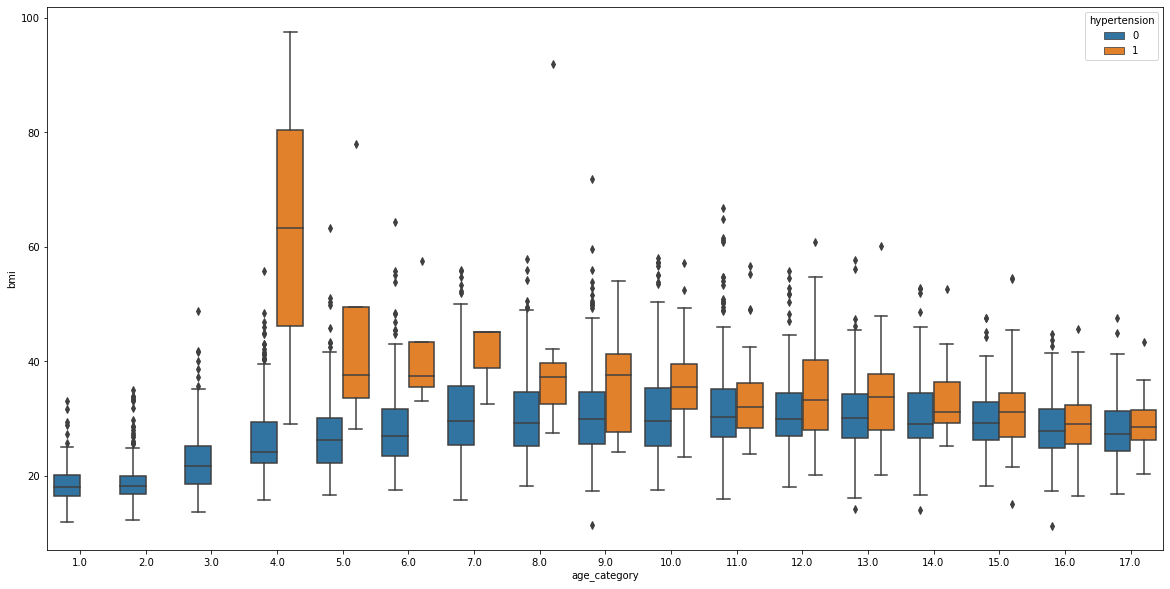

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df2, x = 'age_category',y='bmi' , hue = 'hypertension')

In [41]:
for i in range(1,18):
    print(f'for category {i} , if married YES, the median bmi is : ')
    print(df2[(df2['age_category']==i) & (df2['ever_married_Yes'] == 1)]['bmi'].median())
    print(f'for category {i} , if married NO, the median bmi is : ')
    print(df2[(df2['age_category']==i) & (df2['ever_married_Yes'] == 0)]['bmi'].median())
    i += 1
# GOOD ANALYSIS...but not that useful as the difference between bmi of married and unmarried is not that high..max is only 4
# Hence , we'll resort to excluding the marital condition 

for category 1 , if married YES, the median bmi is : 
nan
for category 1 , if married NO, the median bmi is : 
18.0
for category 2 , if married YES, the median bmi is : 
nan
for category 2 , if married NO, the median bmi is : 
18.3
for category 3 , if married YES, the median bmi is : 
nan
for category 3 , if married NO, the median bmi is : 
21.8
for category 4 , if married YES, the median bmi is : 
27.4
for category 4 , if married NO, the median bmi is : 
24.2
for category 5 , if married YES, the median bmi is : 
26.3
for category 5 , if married NO, the median bmi is : 
26.2
for category 6 , if married YES, the median bmi is : 
27.2
for category 6 , if married NO, the median bmi is : 
27.0
for category 7 , if married YES, the median bmi is : 
30.4
for category 7 , if married NO, the median bmi is : 
28.299999999999997
for category 8 , if married YES, the median bmi is : 
29.8
for category 8 , if married NO, the median bmi is : 
29.1
for category 9 , if married YES, the median bmi is : 

In [42]:
for i in range(1,18):
    print(f'for category {i} , if HYPERTENSION YES, the median bmi is : ')
    print(df2[(df2['age_category']==i) & (df2['hypertension'] == 1)]['bmi'].median())
    print(f'for category {i} , if HYPER TENSION NO, the median bmi is : ')
    print(df2[(df2['age_category']==i) & (df2['hypertension'] == 0)]['bmi'].median())
    i += 1    
# IMPORTANT!!!!!!!

for category 1 , if HYPERTENSION YES, the median bmi is : 
nan
for category 1 , if HYPER TENSION NO, the median bmi is : 
18.0
for category 2 , if HYPERTENSION YES, the median bmi is : 
nan
for category 2 , if HYPER TENSION NO, the median bmi is : 
18.3
for category 3 , if HYPERTENSION YES, the median bmi is : 
nan
for category 3 , if HYPER TENSION NO, the median bmi is : 
21.8
for category 4 , if HYPERTENSION YES, the median bmi is : 
63.3
for category 4 , if HYPER TENSION NO, the median bmi is : 
24.2
for category 5 , if HYPERTENSION YES, the median bmi is : 
37.65
for category 5 , if HYPER TENSION NO, the median bmi is : 
26.2
for category 6 , if HYPERTENSION YES, the median bmi is : 
37.5
for category 6 , if HYPER TENSION NO, the median bmi is : 
27.0
for category 7 , if HYPERTENSION YES, the median bmi is : 
45.1
for category 7 , if HYPER TENSION NO, the median bmi is : 
29.5
for category 8 , if HYPERTENSION YES, the median bmi is : 
37.2
for category 8 , if HYPER TENSION NO, the 

# Only hypertension seems out to  be a good metric...tried others as well but none had "significant" variations in the category

In [43]:
def bmi_imputer(cols):
    bmi = cols[0]
    age_cat = cols[1]
    ht = cols[2]
    if pd.isnull(bmi):
        if age_cat == 1:
            return 18
        elif age_cat == 2:
            return 18.3
        elif age_cat == 3:
            return 21.8
        elif ((age_cat == 4) & (ht == 1)):
            return 63.3
        elif ((age_cat == 4) & (ht == 0)):
            return 24.2
        elif ((age_cat == 5) & (ht == 1)):
            return 37.65
        elif ((age_cat == 5) & (ht == 0)):
            return 26.2
        elif ((age_cat == 6) & (ht == 1)):
            return 37.5
        elif ((age_cat == 6) & (ht == 0)):
            return 27
        elif ((age_cat == 7) & (ht == 1)):
            return 45.1
        elif ((age_cat == 7) & (ht == 0)):
            return 29.5
        elif ((age_cat == 8) & (ht == 1)):
            return 37.2
        elif ((age_cat == 8) & (ht == 0)):
            return 29.25
        elif ((age_cat == 9) & (ht == 1)):
            return 37.65
        elif ((age_cat == 9) & (ht == 0)):
            return 30
        elif ((age_cat == 10) & (ht == 1)):
            return 35.5
        elif ((age_cat == 10) & (ht == 0)):
            return 29.6
        elif ((age_cat == 11) & (ht == 1)):
            return 32.05
        elif ((age_cat == 11) & (ht == 0)):
            return 30.2
        elif ((age_cat == 12) & (ht == 1)):
            return 33.2
        elif ((age_cat == 12) & (ht == 0)):
            return 30
        elif ((age_cat == 13) & (ht == 1)):
            return 33.75
        elif ((age_cat == 13) & (ht == 0)):
            return 30.1
        elif ((age_cat == 14) & (ht == 1)):
            return 31.1
        elif ((age_cat == 14) & (ht == 0)):
            return 29
        elif ((age_cat == 15) & (ht == 1)):
            return 31.1
        elif ((age_cat == 15) & (ht == 0)):
            return 29.25
        elif ((age_cat == 16) & (ht == 1)):
            return 29
        elif ((age_cat == 16) & (ht == 0)):
            return 27.85
        elif ((age_cat == 17) & (ht == 1)):
            return 28.55
        elif ((age_cat == 17) & (ht == 0)):
            return 27.35
    else:
        return bmi
            

In [44]:
df2['bmi'] = df2[['bmi' , 'age_category' , 'hypertension']].apply(bmi_imputer , axis=1)

In [45]:
df2.isna().sum()

age                                0
hypertension                       0
heart_disease                      0
avg_glucose_level                  0
bmi                                5
gender_Male                        0
gender_Other                       0
ever_married_Yes                   0
work_type_Never_worked             0
work_type_Private                  0
work_type_Self-employed            0
work_type_children                 0
Residence_type_Urban               0
smoking_status_formerly smoked     0
smoking_status_never smoked        0
smoking_status_smokes              0
stroke                             0
age_category                      72
dtype: int64

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5105 non-null   float64
 5   gender_Male                     5110 non-null   int64  
 6   gender_Other                    5110 non-null   int64  
 7   ever_married_Yes                5110 non-null   int64  
 8   work_type_Never_worked          5110 non-null   int64  
 9   work_type_Private               5110 non-null   int64  
 10  work_type_Self-employed         5110 non-null   int64  
 11  work_type_children              5110 non-null   int64  
 12  Residence_type_Urban            51

In [47]:
df = df2.copy()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5105 non-null   float64
 5   gender_Male                     5110 non-null   int64  
 6   gender_Other                    5110 non-null   int64  
 7   ever_married_Yes                5110 non-null   int64  
 8   work_type_Never_worked          5110 non-null   int64  
 9   work_type_Private               5110 non-null   int64  
 10  work_type_Self-employed         5110 non-null   int64  
 11  work_type_children              5110 non-null   int64  
 12  Residence_type_Urban            51

In [49]:
df.drop('age_category' , axis=1 , inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5105 non-null   float64
 5   gender_Male                     5110 non-null   int64  
 6   gender_Other                    5110 non-null   int64  
 7   ever_married_Yes                5110 non-null   int64  
 8   work_type_Never_worked          5110 non-null   int64  
 9   work_type_Private               5110 non-null   int64  
 10  work_type_Self-employed         5110 non-null   int64  
 11  work_type_children              5110 non-null   int64  
 12  Residence_type_Urban            51

In [51]:
df.dropna(inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5105 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5105 non-null   float64
 1   hypertension                    5105 non-null   int64  
 2   heart_disease                   5105 non-null   int64  
 3   avg_glucose_level               5105 non-null   float64
 4   bmi                             5105 non-null   float64
 5   gender_Male                     5105 non-null   int64  
 6   gender_Other                    5105 non-null   int64  
 7   ever_married_Yes                5105 non-null   int64  
 8   work_type_Never_worked          5105 non-null   int64  
 9   work_type_Private               5105 non-null   int64  
 10  work_type_Self-employed         5105 non-null   int64  
 11  work_type_children              5105 non-null   int64  
 12  Residence_type_Urban            51

# SEEMS LIKE DATASET HAS BEEN MORE OR LESS CLEANED!!

In [54]:
df.tail(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
5100,82.0,1,0,71.97,28.30,1,0,1,0,0,1,0,0,0,1,0,0
5101,45.0,0,0,97.95,24.50,0,0,1,0,1,0,0,1,0,0,0,0
5102,57.0,0,0,77.93,21.70,0,0,1,0,1,0,0,0,0,1,0,0
5103,18.0,0,0,82.85,46.90,0,0,0,0,1,0,0,1,0,0,0,0
5104,13.0,0,0,103.08,18.60,0,0,0,0,0,0,1,0,0,0,0,0
5105,80.0,1,0,83.75,28.55,0,0,1,0,1,0,0,1,0,1,0,0
5106,81.0,0,0,125.20,40.00,0,0,1,0,0,1,0,1,0,1,0,0
5107,35.0,0,0,82.99,30.60,0,0,1,0,0,1,0,0,0,1,0,0
5108,51.0,0,0,166.29,25.60,1,0,1,0,1,0,0,0,1,0,0,0
5109,44.0,0,0,85.28,26.20,0,0,1,0,0,0,0,1,0,0,0,0


# LET'S CHECK WHETHER THE DATA DISTRIBUTION OF THE DEPENDENT VARIABLE IS NORMAL OR NOT, DEPENDING ON THAT WE'LL CHOOSE STANDARDIZATION METHOD

<AxesSubplot:xlabel='bmi', ylabel='Count'>

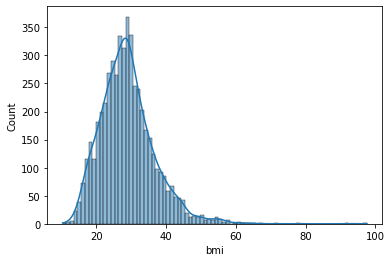

In [55]:
sns.histplot(data=df, x = 'bmi', kde=True)
# Left skewed ...not normal distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

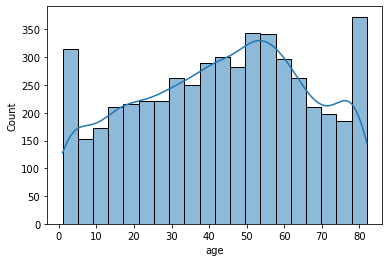

In [56]:
sns.histplot(data=df, x = 'age', kde=True)
# definitely not normal distribution

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

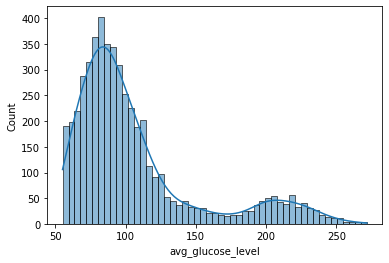

In [57]:
sns.histplot(data=df, x = 'avg_glucose_level', kde=True)
# not a normal distribution

# NONE OF OUR CONTINOUS VARIABLE ARE NORMALLY DISTRIBUTED; HENCE, WE'LL APPLY STANDARD SCALAR

In [58]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [59]:
from sklearn.model_selection import train_test_split

# SINCE DATA IS HIGHLY UNBALANCED, (ONLY 5% VALUES HAVE STROKE=1), WE'LL DO A BIT OF DATA MANIPULATION

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# LET'S TRY REMAKING A DATASET OUT OF df WHICH FOLLOWS A TREND SIMILAR TO df BUT HAS LESS VALUES OF STROKE=0 AND THE RETAINING THE ROWNS WITH STROKE=1

In [62]:
len(df[df['stroke']==0])

4857

In [63]:
df_0 = df[df['stroke']==0]
df_1 = df[df['stroke']==1]

In [82]:
df_0 = df_0.sample(1250 , random_state=42)

In [83]:
df_new = pd.concat([df_0,df_1] , axis=0)

In [84]:
df_new.reset_index(inplace=True)

In [85]:
df_new.drop('index',axis=1,inplace=True)

In [86]:
df_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,27.0,0,0,80.57,39.8,0,0,1,0,1,0,0,1,0,0,1,0
1,50.0,0,0,77.65,24.4,1,0,1,0,1,0,0,0,0,0,1,0
2,7.0,0,0,88.39,19.7,1,0,0,0,0,0,1,0,0,0,0,0
3,24.0,0,0,72.29,22.2,1,0,0,0,1,0,0,1,0,0,0,0
4,8.0,0,0,87.92,14.1,0,0,0,0,0,0,1,0,0,0,0,0


In [87]:
A = df_new.drop('stroke',axis=1)
B = df_new['stroke']
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=42)
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

#  RANDOM FOREST

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [89]:
rf_f1 = []
for i in range(1,101):
    rf_new = RandomForestClassifier(n_estimators=i ,random_state=42)
    rf_new.fit(A_train,B_train)
    rf_new_pred = rf_new.predict(scaler.transform(X))
    rf_f1.append(f1_score(y,rf_new_pred))

In [90]:
rf_df = pd.DataFrame({'Trees': np.arange(1,101) , 'f1':rf_f1})
rf_df[rf_df['f1']==rf_df['f1'].max()]

,Trees,f1
47,48,0.701874


In [91]:
rf_new = RandomForestClassifier(n_estimators=76 , random_state=42)
rf_new.fit(A_train,B_train)
rf_new_pred = rf_new.predict(scaler.transform(X))
f1_score(y,rf_new_pred)

0.6898839137645107

In [92]:
print(confusion_matrix(y,rf_new_pred))
print('\n')
print(classification_report(y,rf_new_pred))

[[4710  147]
 [  40  208]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4857
           1       0.59      0.84      0.69       248

    accuracy                           0.96      5105
   macro avg       0.79      0.90      0.84      5105
weighted avg       0.97      0.96      0.97      5105

